# Análisis de viajes en Zuber: Proyecto de Análisis Exploratorio de Datos

## Introducción

En este proyecto, trabajamos como analistas para Zuber, una nueva empresa de viajes compartidos en Chicago. El objetivo es realizar un análisis de datos utilizando información disponible sobre los viajes en taxi, las empresas de taxis y el clima en Chicago durante el mes de noviembre de 2017. A través de este análisis, se buscarán patrones en las preferencias de los pasajeros y se investigará el impacto de factores externos, como las condiciones climáticas, en los viajes.

Este proyecto está estructurado en varios pasos que incluyen análisis exploratorio de datos y una prueba de hipótesis. La información utilizada proviene de una base de datos con datos de viajes en taxi, detalles sobre los taxis y las condiciones climáticas registradas. A lo largo del análisis, se aplicarán técnicas de agregación, agrupamiento y visualización de datos para extraer conclusiones útiles.

En la primera parte del proyecto, se analizarán datos sobre los viajes realizados por diferentes empresas de taxis, con el objetivo de identificar las compañías más populares y examinar el impacto del clima en los patrones de viajes.


## Análisis exploratorio de datos (Python)

En este apartado, vamos a realizar un análisis exploratorio de los datos proporcionados en dos archivos CSV. Los datos nos proporcionan información clave sobre el número de viajes de taxis en Chicago y los barrios donde estos viajes finalizaron.

1. **Archivo `project_sql_result_01.csv`:** Este dataset contiene información sobre las compañías de taxis y el número de viajes realizados por cada una durante el 15 y 16 de noviembre de 2017. Las columnas incluidas son:
   - `company_name`: El nombre de la empresa de taxis.
   - `trips_amount`: La cantidad de viajes realizados por cada compañía.

2. **Archivo `project_sql_result_04.csv`:** Este dataset proporciona información sobre el promedio de viajes que terminaron en distintos barrios de Chicago durante noviembre de 2017. Las columnas incluidas son:
   - `dropoff_location_name`: El nombre del barrio donde finalizaron los viajes.
   - `average_trips`: El promedio de viajes que finalizaron en cada barrio.


Nuestro primer objetivo será:
- Importar ambos archivos CSV.
- Estudiar los datos contenidos en ellos.
- Asegurarnos de que los tipos de datos sean correctos para poder trabajar adecuadamente con los mismos en análisis posteriores.

Empezaremos importando los archivos CSV y realizando una inspección preliminar de los datos.


In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd

# Cargamos los datasets
df_taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
df_bairros = pd.read_csv('/datasets/project_sql_result_04.csv')

# Mostramos las primeras filas de ambos DataFrames para inspeccionar los datos
print("Datos sobre las empresas de taxis:")
print(df_taxis.head())

print("\nDatos sobre los barrios donde finalizaron los viajes:")
print(df_bairros.head())

print(df_taxis.dtypes)
print(df_bairros.dtypes)


Datos sobre las empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Datos sobre los barrios donde finalizaron los viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


### Resultados preliminares y próximos pasos

Hemos importado los dos archivos CSV y realizado una inspección inicial de los datos. A continuación se describen los resultados:

1. **Datos sobre las empresas de taxis:**
   - El archivo `project_sql_result_01.csv` contiene información sobre las empresas de taxis y el número de viajes realizados los días 15 y 16 de noviembre de 2017. La columna `company_name` tiene el tipo de datos `object` (texto), mientras que `trips_amount` es de tipo `int64`, lo cual es apropiado para representar la cantidad de viajes.

2. **Datos sobre los barrios donde finalizaron los viajes:**
   - El archivo `project_sql_result_04.csv` contiene información sobre el promedio de viajes finalizados en distintos barrios durante noviembre de 2017. La columna `dropoff_location_name` también es de tipo `object`, mientras que `average_trips` es de tipo `float64`, lo cual es adecuado dado que se trata de un promedio.

### Próximos pasos

Aparentemente, los tipos de datos en ambos datasets son correctos y no se requiere realizar conversiones en este momento. 

Sin embargo, procederemos a realizar una verificación más detallada para asegurarnos de que no haya valores nulos u otros problemas que puedan afectar los análisis posteriores. A continuación, vamos a:
- Verificar si hay valores ausentes (`NaN`).
- Analizar las estadísticas descriptivas de las columnas numéricas.


In [2]:
# Verificamos si hay valores nulos en los DataFrames
print("Valores nulos en el DataFrame de empresas de taxis:")
print(df_taxis.isnull().sum())

print("\nValores nulos en el DataFrame de barrios:")
print(df_bairros.isnull().sum())

# Mostramos estadísticas descriptivas para los datos numéricos
print("\nEstadísticas descriptivas de los viajes por empresa de taxis:")
print(df_taxis.describe())

print("\nEstadísticas descriptivas de los viajes finalizados en barrios:")
print(df_bairros.describe())


Valores nulos en el DataFrame de empresas de taxis:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en el DataFrame de barrios:
dropoff_location_name    0
average_trips            0
dtype: int64

Estadísticas descriptivas de los viajes por empresa de taxis:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Estadísticas descriptivas de los viajes finalizados en barrios:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


### Resultados del análisis de valores nulos y estadísticas descriptivas

#### Verificación de valores nulos
Al analizar los dos DataFrames, encontramos que no hay valores nulos en ninguna de las columnas. Esto indica que ambos datasets están completos y no será necesario realizar ningún tratamiento de valores ausentes.

- **DataFrame de empresas de taxis:**
  - `company_name`: 0 valores nulos.
  - `trips_amount`: 0 valores nulos.

- **DataFrame de barrios:**
  - `dropoff_location_name`: 0 valores nulos.
  - `average_trips`: 0 valores nulos.

#### Estadísticas descriptivas

##### Viajes por empresa de taxis:
- La columna `trips_amount` contiene datos sobre el número de viajes realizados por las empresas de taxis los días 15 y 16 de noviembre de 2017.
- El número total de empresas analizadas es **64**.
- El número promedio de viajes es **2145.48**, con una desviación estándar de **3812.31**, lo que indica una gran dispersión en la cantidad de viajes entre las distintas empresas.
- El número mínimo de viajes es **2**, mientras que el máximo es **19,558**, lo que muestra que algunas empresas realizaron significativamente más viajes que otras.
- El 50% de las empresas realizaron menos de **178.5** viajes.

##### Viajes finalizados en barrios:
- La columna `average_trips` contiene el promedio de viajes que finalizaron en cada barrio durante noviembre de 2017.
- El número total de barrios analizados es **94**.
- El promedio de viajes finalizados en cada barrio es **599.95**, con una desviación estándar de **1714.59**, lo que indica que hay barrios donde la cantidad de viajes finalizados es significativamente mayor que en otros.
- El barrio con el menor número promedio de viajes tuvo **1.8** viajes finalizados, mientras que el barrio con el mayor número promedio tuvo **10,727.47** viajes.
- El 50% de los barrios tuvieron menos de **52.02** viajes finalizados en promedio.

#### Próximos pasos
Dado que no hay valores nulos y las estadísticas parecen coherentes, continuaremos con el análisis exploratorio más detallado. A continuación, identificaremos los 10 principales barrios en términos de finalización de viajes y crearemos gráficos para visualizar los datos tanto de las empresas de taxis como de los barrios.


### Identificación de los 10 principales barrios en términos de finalización del recorrido

En este punto del análisis, nos enfocaremos en identificar los barrios donde finalizaron más viajes de taxis durante noviembre de 2017. Esto nos permitirá observar las zonas más transitadas y generar posibles insights sobre la demanda de taxis en estos lugares.

El objetivo es seleccionar los 10 barrios con el mayor promedio de viajes finalizados, utilizando la columna `average_trips` del dataset correspondiente. Este análisis nos ayudará a comprender mejor la distribución de la actividad de los taxis en la ciudad y cuáles son las áreas clave para el negocio.

A continuación, identificaremos estos barrios y los ordenaremos de forma descendente según el número promedio de viajes.


In [5]:
# Ordenamos el DataFrame de barrios por average_trips en orden descendente y seleccionamos los 10 primeros
top_10_barrios = df_bairros.sort_values(by='average_trips', ascending=False).head(11)

# Mostramos los 10 principales barrios
top_10_barrios


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Gráficos: empresas de taxis y número de viajes, 10 barrios principales por número de finalizaciones

Para visualizar mejor los datos obtenidos, vamos a generar dos gráficos. El primero mostrará el número de viajes de cada empresa de taxis y el segundo representará los 10 principales barrios en términos de finalización de recorridos.

Estos gráficos nos ayudarán a comparar visualmente el desempeño de las distintas empresas de taxis y a identificar los barrios con mayor demanda de taxis.

A continuación, generaremos estos gráficos utilizando las bibliotecas `matplotlib` y `seaborn`.


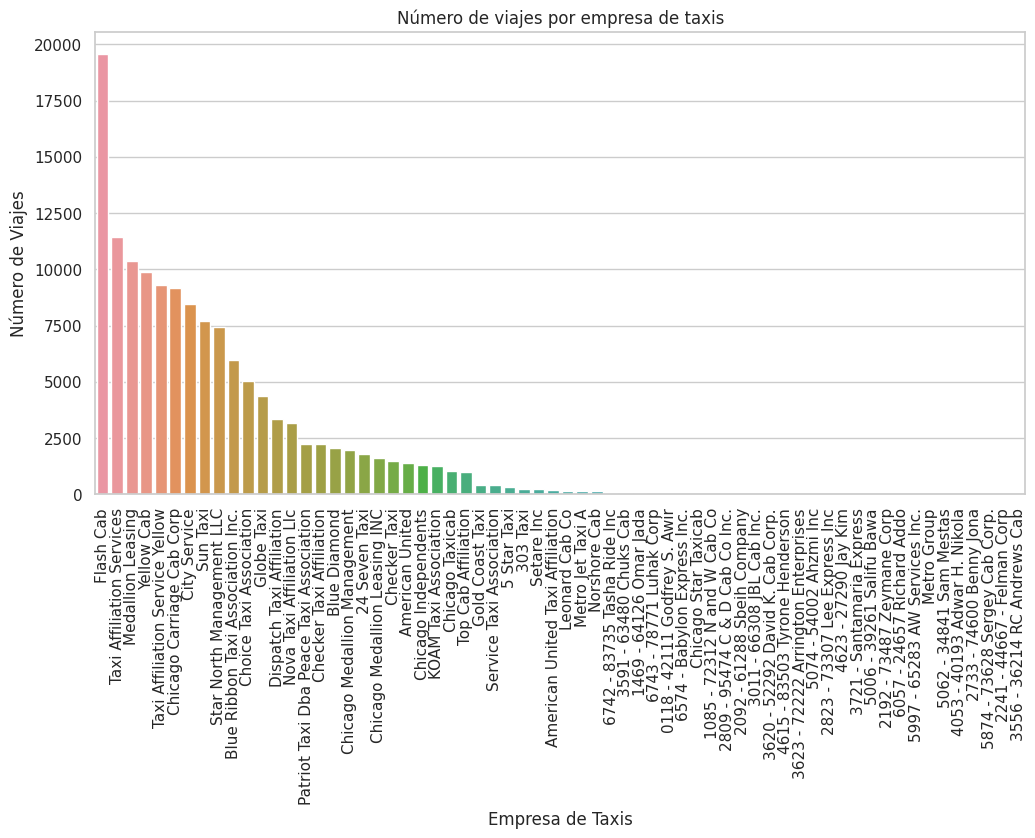

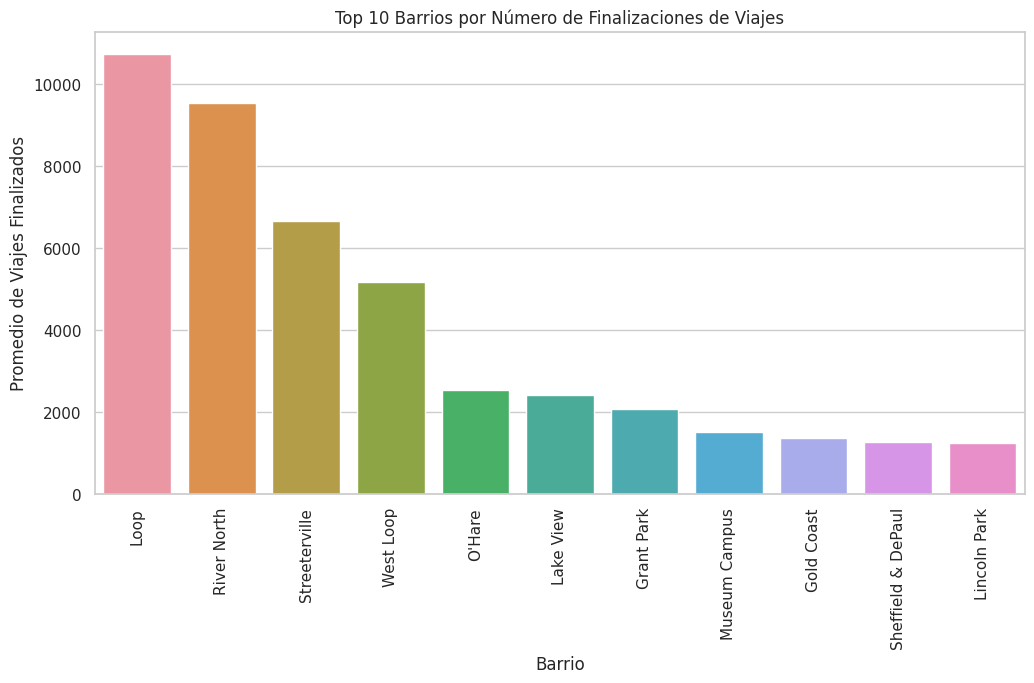

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de empresas de taxis y número de viajes
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=df_taxis.sort_values(by='trips_amount', ascending=False))
plt.xticks(rotation=90)
plt.title('Número de viajes por empresa de taxis')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.show()

# Gráfico de los 10 principales barrios por número de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_barrios)
plt.xticks(rotation=90)
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes Finalizados')
plt.show()


### Conclusiones basadas en los gráficos:

#### Gráfico 1: Número de viajes por empresa de taxis
El primer gráfico nos muestra una clara dominancia de algunas empresas de taxis, como Flash Cab y Taxi Affiliation Services, las cuales realizaron la mayor cantidad de viajes el 15 y 16 de noviembre de 2017. Flash Cab destaca significativamente con casi 20,000 viajes, mientras que otras compañías, como Taxi Affiliation Services y Medallion Leasing, también tienen una presencia considerable, con más de 10,000 viajes cada una. Sin embargo, la mayoría de las empresas en la lista tienen un número mucho menor de viajes, lo que sugiere una distribución desigual en el mercado, donde unas pocas compañías grandes acaparan la mayor parte de los viajes.

#### Gráfico 2: Promedio de viajes finalizados por barrio
El segundo gráfico presenta los 10 barrios principales por el promedio de viajes finalizados en noviembre de 2017. El barrio Loop se destaca como el más concurrido, con un promedio de más de 10,000 viajes finalizados, seguido por River North con un promedio cercano a los 9,500. Estos barrios parecen ser puntos clave de actividad para los servicios de taxis. Además, otros barrios como Streeterville y West Loop también son zonas importantes, con más de 5,000 viajes en promedio. A partir de estos resultados, se puede deducir que los taxis tienen una mayor actividad en el centro y áreas adyacentes de Chicago, posiblemente debido a una mayor concentración de actividades comerciales, turísticas y laborales.

#### Comparación
El análisis de ambos gráficos nos proporciona una visión clara de las dinámicas de los servicios de taxis en Chicago. Por un lado, algunas empresas dominan el mercado, y por otro lado, ciertos barrios atraen más viajes que otros. Las áreas más concurridas, como Loop y River North, probablemente influyen en la demanda de viajes, lo que explica por qué las empresas más grandes tienen un número significativamente mayor de viajes.


### Paso 5: Prueba de hipótesis (Python)

En este paso, nos enfocaremos en analizar los datos de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare para probar la hipótesis de que la duración promedio de los viajes cambia en los sábados lluviosos en comparación con los sábados con buen clima. 

Primero, importaremos el archivo `project_sql_result_07.csv`, el cual contiene la información necesaria sobre los viajes: la fecha y hora de la recogida (`start_ts`), las condiciones climáticas al momento de iniciar el viaje (`weather_conditions`), y la duración del viaje en segundos (`duration_seconds`). A partir de estos datos, realizaremos un análisis estadístico para probar la hipótesis.

#### Planteamiento de la hipótesis:
- **Hipótesis nula (H0):** La duración promedio de los viajes desde el Loop hasta O'Hare no cambia en los sábados lluviosos. Es decir, la duración promedio de los viajes es la misma independientemente de las condiciones climáticas.
- **Hipótesis alternativa (H1):** La duración promedio de los viajes desde el Loop hasta O'Hare cambia en los sábados lluviosos. Es decir, las condiciones climáticas afectan la duración de los viajes.

Utilizaremos una prueba estadística para comparar las duraciones de los viajes en función de las condiciones climáticas (lluvioso o buen clima). Estableceremos un nivel de significación (alfa) para determinar si podemos rechazar la hipótesis nula. Empezaremos por importar el dataset y examinar los datos antes de continuar con las pruebas estadísticas.


In [8]:
# Importamos las bibliotecas necesarias
import pandas as pd

# Cargamos el dataset con los datos sobre los viajes
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Mostramos las primeras filas del DataFrame para inspeccionar los datos
print("Datos sobre los viajes desde el Loop hasta O'Hare:")
print(df_trips.head())

# Verificamos si hay valores nulos
print("\nValores nulos en el DataFrame:")
print(df_trips.isnull().sum())

# Verificamos los tipos de datos
print("\nTipos de datos en el DataFrame:")
print(df_trips.dtypes)


Datos sobre los viajes desde el Loop hasta O'Hare:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Valores nulos en el DataFrame:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Tipos de datos en el DataFrame:
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


### Prueba de hipótesis sobre la duración de los viajes en días lluviosos

En esta sección realizaremos una prueba de hipótesis para determinar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en días lluviosos en comparación con días con buen clima.

#### Planteamiento de las hipótesis:

- **Hipótesis nula (H₀):** No existe una diferencia significativa en la duración de los viajes en días lluviosos y días con buen clima.
- **Hipótesis alternativa (H₁):** Existe una diferencia significativa en la duración de los viajes en días lluviosos en comparación con días con buen clima.

#### Pasos que seguiremos:

1. Filtraremos los datos para separar los viajes en dos grupos: los que ocurrieron en días con buen clima (condiciones meteorológicas etiquetadas como "Good") y los que ocurrieron en días lluviosos (condiciones etiquetadas como "Bad").
2. Usaremos una prueba t de Student independiente para comparar las medias de los dos grupos. Esta prueba nos permitirá saber si existe una diferencia estadísticamente significativa entre la duración promedio de los viajes en ambos tipos de días.
3. Estableceremos un nivel de significación de alfa = 0.05 para evaluar el resultado de la prueba.
4. Si el valor p obtenido es menor que alfa, rechazaremos la hipótesis nula, lo que indicará que la duración promedio de los viajes sí cambia en días lluviosos. Si el valor p es mayor que alfa, no podremos rechazar la hipótesis nula, lo que significará que no hay una diferencia significativa en la duración de los viajes.

Después de ejecutar la prueba, interpretaremos los resultados en base al valor p y tomaremos una decisión sobre la hipótesis.



In [9]:
from scipy import stats

# Filtramos los datos por condiciones climáticas
viajes_buen_clima = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
viajes_mal_clima = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']

# Verificamos los tamaños de muestra
print("Cantidad de viajes en buen clima:", len(viajes_buen_clima))
print("Cantidad de viajes en mal clima:", len(viajes_mal_clima))

# Realizamos la prueba t de Student
t_stat, p_value = stats.ttest_ind(viajes_buen_clima, viajes_mal_clima)

# Establecemos el nivel de significación (alfa)
alfa = 0.05

# Mostramos los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alfa:
    print("Rechazamos la hipótesis nula: la duración de los viajes cambia en días lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencias significativas en la duración de los viajes.")


Cantidad de viajes en buen clima: 888
Cantidad de viajes en mal clima: 180
Estadístico t: -6.946177714041499
Valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: la duración de los viajes cambia en días lluviosos.


### Conclusión sobre la prueba de hipótesis

La prueba t de Student fue utilizada para comparar la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos (etiquetados como "Bad") y días con buen clima (etiquetados como "Good"). El análisis resultó en un valor p muy pequeño (6.52e-12), lo que es significativamente menor que el nivel de significación alfa de 0.05.

#### Interpretación de los resultados:
- Dado que el valor p es menor que alfa, podemos rechazar la hipótesis nula. Esto indica que **la duración promedio de los viajes sí cambia significativamente en días lluviosos**.
- El estadístico t negativo (-6.95) sugiere que los viajes en días lluviosos son más largos en comparación con los viajes en días con buen clima.

Este hallazgo es importante para la empresa Zuber, ya que los tiempos de viaje pueden verse afectados por las condiciones meteorológicas adversas, lo que debería ser tenido en cuenta para la planificación y la eficiencia operativa.
